In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os, random, cv2
%matplotlib inline

In [2]:
filenames = os.listdir("/home/trantorchd.com/paritosh.yadav/downloads/Polar bears")

In [3]:
filenames

['12.30986547240_fdb6f6a2ff_o.0.jpg',
 '13.A-polar-bear-approaches-t-010.jpg',
 '4.Original_WW22791.jpg',
 '20.bear-1549900314.jpg',
 '8.polar-bear-expert-purged-2.jpg',
 '3.polar-bear-hero.jpg',
 '2.tnc_17745326_preview-1260x708.jpg',
 '18.Polar_bear_Arctic.jpg',
 '5.maxresdefault.jpg',
 '19.polar-cub.jpg',
 '9.standing-bear_shutterstock_751891378_cropped-web-sized-1-e1559600104420.jpg',
 '6.Polar-bears-ice-floe-Norway.jpg',
 '11.ct_110915-23.jpg',
 '7.POLAR-BEAR-EATING-A-BEARDED-SEAL-SPITSBERGEN.jpg',
 '16.polarbearjoyviola.jpg',
 '1.Polar_Bear_-_Alaska_%28cropped%29.jpg',
 '17.header-polar-bear-conflict.jpg',
 '10.hKJxsUT2bJMcb2YLeb7PQZ-320-80.jpg',
 '14.Polar-bear-cubs.jpg',
 '15.polar-bear-MAIN2.jpg']

(1063, 1600, 3)

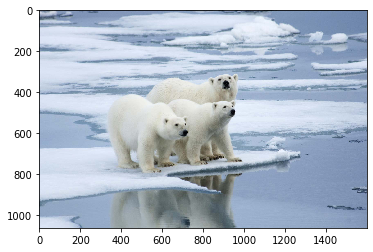

In [4]:
sample =plt.imread('/home/trantorchd.com/paritosh.yadav/downloads/Polar bears/' + random.choice(filenames))
plt.imshow(sample)
plt.grid(False)
sample.shape

In [5]:
"dog" in '/content/train/dog.9671'

True

In [6]:
import cv2

In [7]:
image = cv2.imread('/home/trantorchd.com/paritosh.yadav/downloads/Polar bears/' + random.choice(filenames))

In [8]:
image.shape

(708, 1260, 3)

In [9]:
image = cv2.resize(image, (128, 128))

In [10]:
# The required dimension: (# M images, height, width, RGB)
x_train=image.reshape(-1,image.shape[0],image.shape[1],3).shape
y_train=np.array([0])

(128, 128, 3)

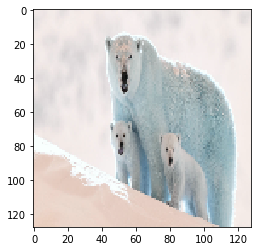

In [11]:
plt.imshow(image) # Plot a sample image
plt.grid(False)
image.shape

In [12]:
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,Flatten
from keras import optimizers

Using TensorFlow backend.
/home/trantorchd.com/paritosh.yadav/anaconda3/envs/deeplearning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/trantorchd.com/paritosh.yadav/anaconda3/envs/deeplearning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/trantorchd.com/paritosh.yadav/anaconda3/envs/deeplearning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)

In [13]:
filer_size=(3,3)
input_size=(128,128,3)
inputs = Input(shape=input_size)



In [14]:
output_1 = Conv2D(filters=64,kernel_size=filer_size,padding='same',activation='relu')(inputs)
output_2 = Conv2D(filters=64,kernel_size=filer_size,padding='same',activation='relu')(output_1)
polling_3 = MaxPooling2D(pool_size=2,strides=2)(output_2)

output_4 = Conv2D(filters=128,kernel_size=filer_size,padding='same',activation='relu')(polling_3)
output_5 = Conv2D(filters=128,kernel_size=filer_size,padding='same',activation='relu')(output_4)
polling_6 = MaxPooling2D(pool_size=2,strides=2)(output_5)

output_7 = Conv2D(filters=256,kernel_size=filer_size,padding='same',activation='relu')(polling_6)
polling_8 = MaxPooling2D(pool_size=2,strides=2)(output_7)

output_9 = Conv2D(filters=512,kernel_size=filer_size,padding='same',activation='relu')(polling_8)
polling_10 = MaxPooling2D(pool_size=2,strides=2)(output_9)

output_11 = Conv2D(filters=512,kernel_size=filer_size,padding='same',activation='relu')(polling_10)
polling_12 = MaxPooling2D(pool_size=2,strides=2)(output_11)

flatten_13 = Flatten()(polling_12)

dense_14 = Dense(1024,activation='relu')(flatten_13)

dense_15 = Dense(1024,activation='relu')(dense_14)
# keras.layers.Dropout(rate, noise_shape=None, seed=None)
prediction = Dense(1,activation="sigmoid")(dense_15)

model = Model(inputs=inputs,outputs=prediction)

model.compile(loss = 'binary_crossentropy',
                    optimizer = optimizers.SGD(lr = 0.05), metrics = ['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0   

In [16]:

model.fit(x_train,y_train)

AttributeError: 'tuple' object has no attribute 'ndim'

In [22]:
x_train,y_train

((1, 128, 128, 3), array([0]))